In [46]:
# pandas
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics.pairwise import cosine_similarity

# get expedia & test csv files as a DataFrame
train_df = pd.read_csv('data/train.csv', nrows=1000)
test_df    = pd.read_csv('data/test.csv', nrows=1000)
destination = pd.read_csv('data/destinations.csv', nrows=10000)

train_df.info()
print("----------------------------")
test_df.info()

# preview the data
train_df.head()

destination.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  1000 non-null   object 
 1   site_name                  1000 non-null   int64  
 2   posa_continent             1000 non-null   int64  
 3   user_location_country      1000 non-null   int64  
 4   user_location_region       1000 non-null   int64  
 5   user_location_city         1000 non-null   int64  
 6   orig_destination_distance  268 non-null    float64
 7   user_id                    1000 non-null   int64  
 8   is_mobile                  1000 non-null   int64  
 9   is_package                 1000 non-null   int64  
 10  channel                    1000 non-null   int64  
 11  srch_ci                    1000 non-null   object 
 12  srch_co                    1000 non-null   object 
 13  srch_adults_cnt            1000 non-null   int64 

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


# Data Preprocessing
The first step is to clean and pre-process the data and perform exploratory analysis to get some interesting insights into the process of choosing a hotel.

* Remove the users who did not booked the hotel
* Identify the searches by each user belonging to a specific type of destination
* orig_destination_distance contains Nan values
* The check-in and check-out dates to find the duration of the stay for each of the entries in the training set.


/tmp/ipykernel_17112/140146169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")
/tmp/ipykernel_17112/140146169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")
/tmp/ipykernel_17112/140146169.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'posa_continent', data=train_df,order=[0,1,2,3,4],palette="Set3",ax=axis1)
/tmp/ipy

<Axes: xlabel='channel', ylabel='count'>

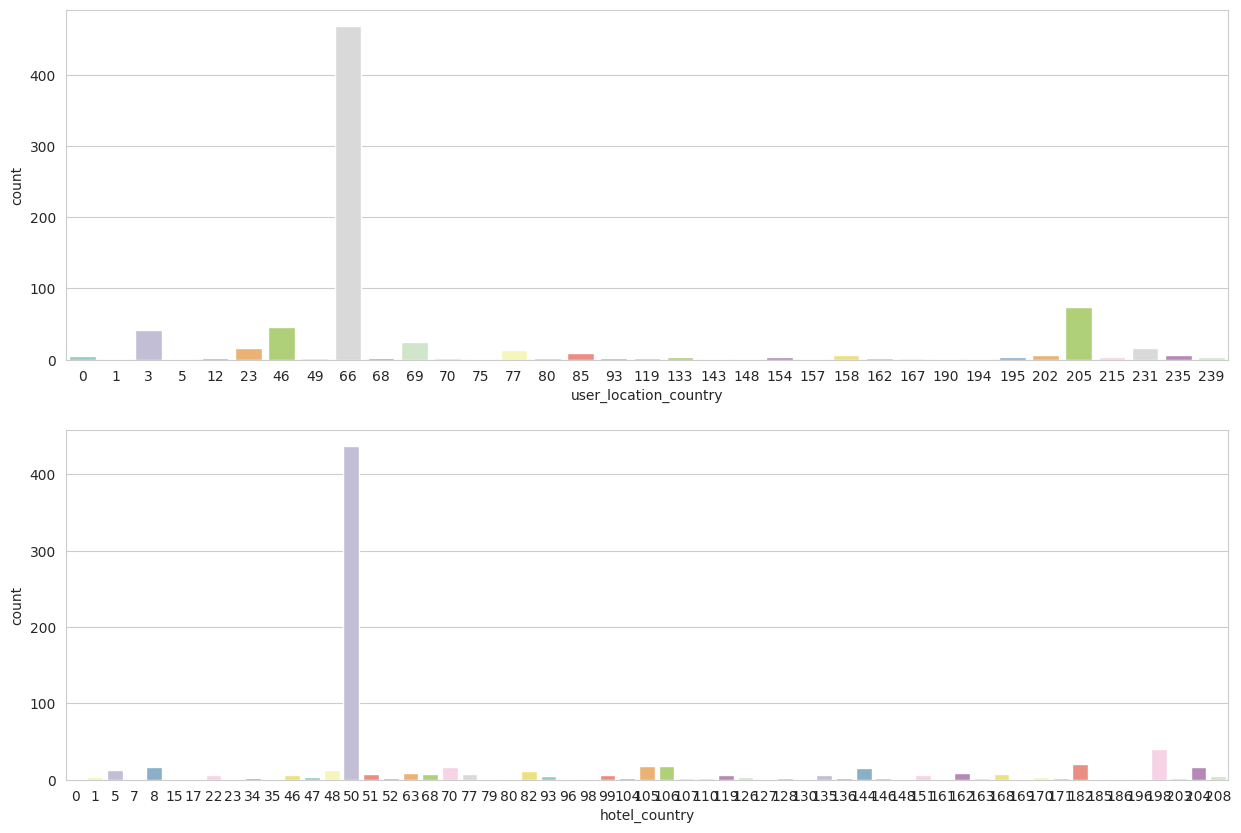

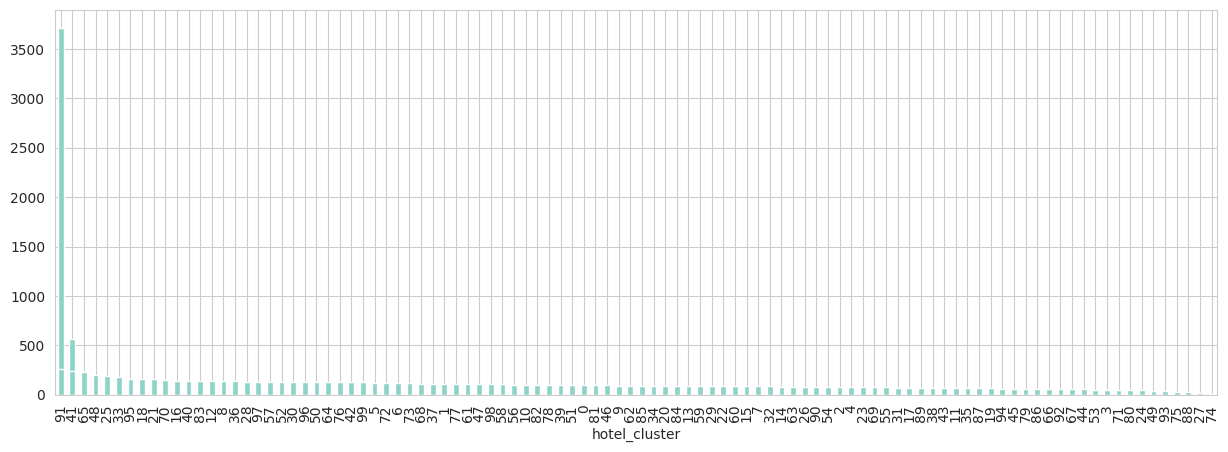

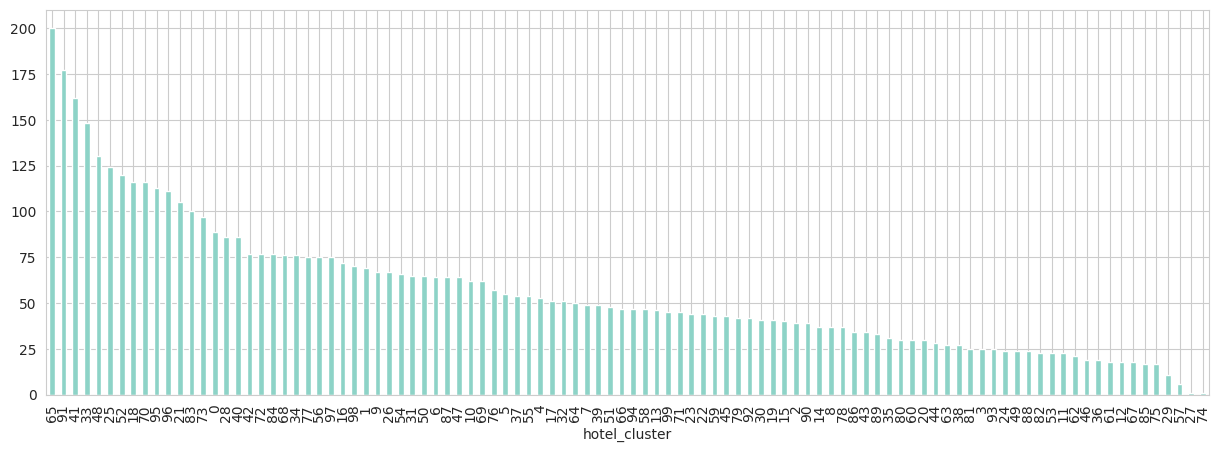

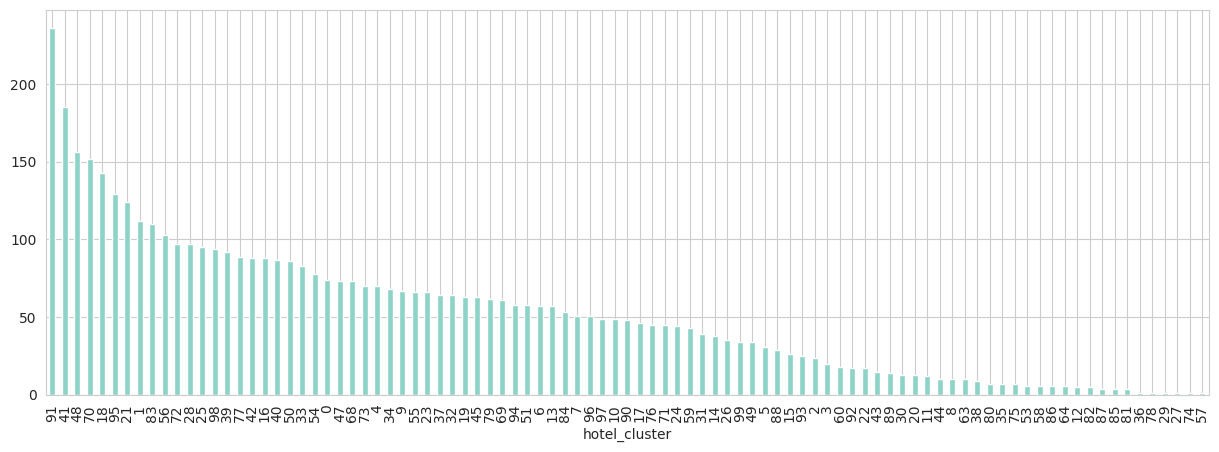

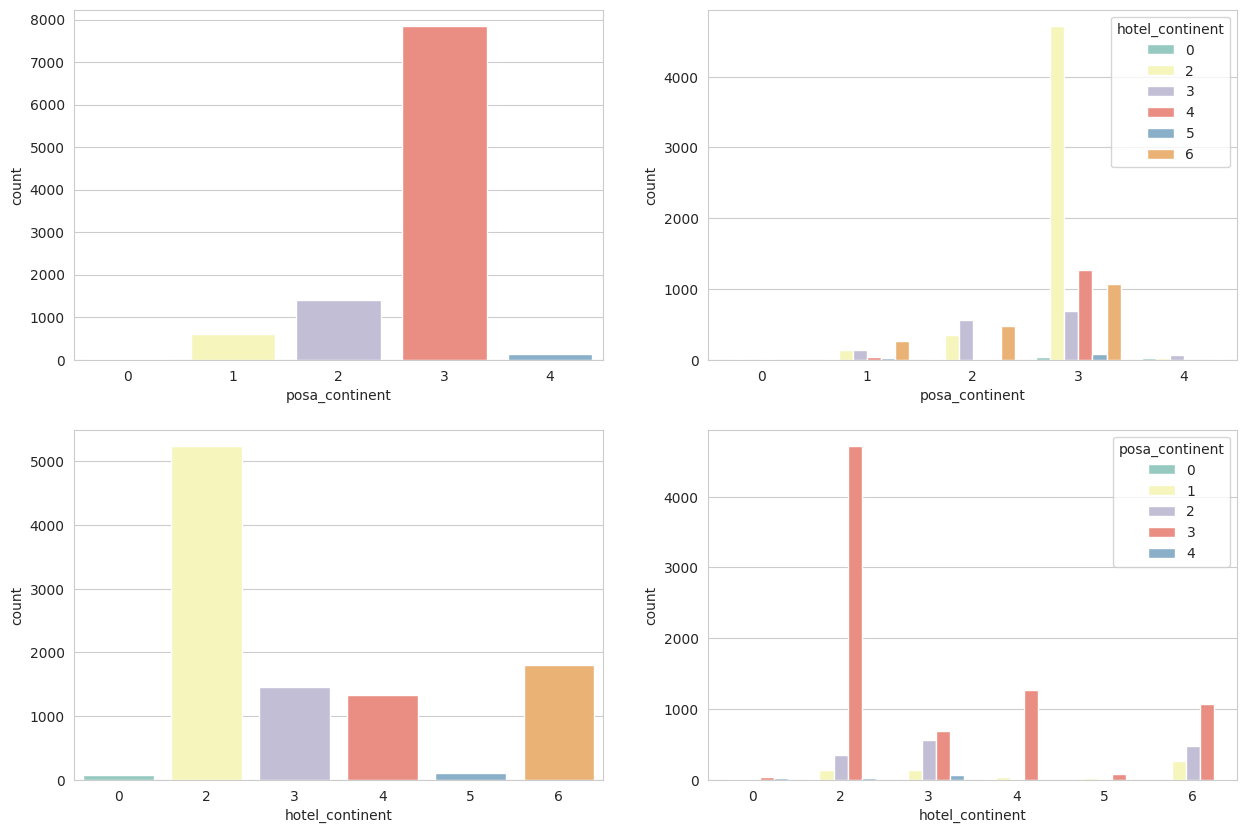

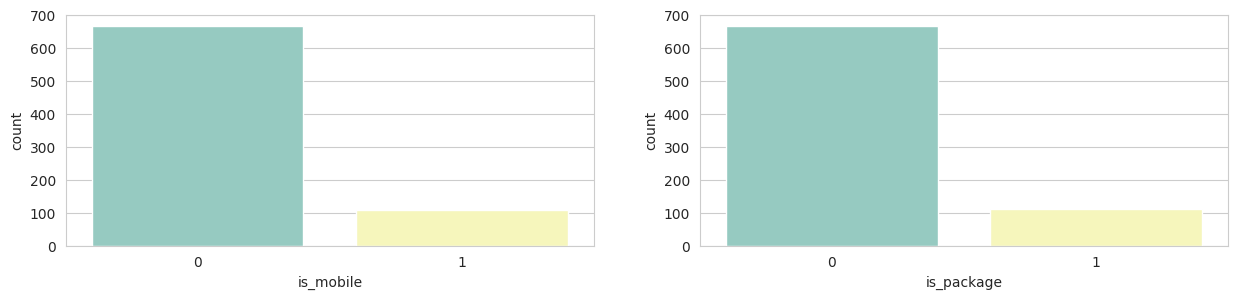

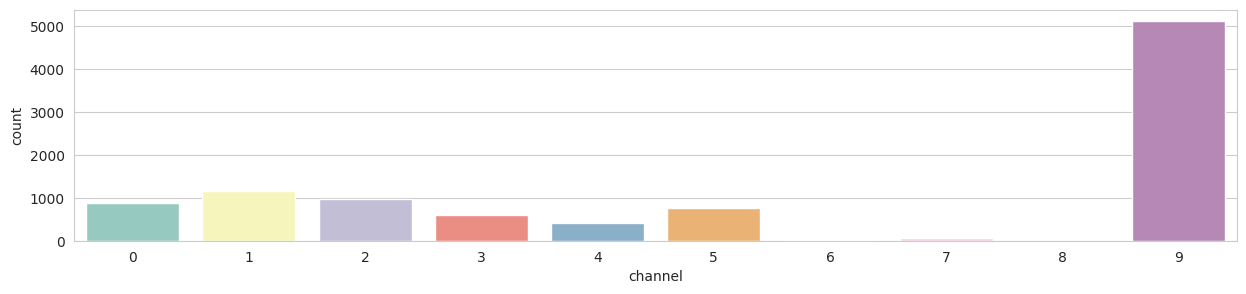

In [2]:
# Plot 
bookings_df = train_df[train_df["is_booking"] == 1]
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
# What are the most countries the customer travel from?
sns.countplot(x='user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot(x='hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")

# Combine both plots
# fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
# sns.distplot(bookings_df["hotel_country"], kde=False, rug=False, bins=25, ax=axis1)
# sns.distplot(bookings_df["user_location_country"], kde=False, rug=False, bins=25, ax=axis1)

# Where do most of the customers from a country travel?
user_country_id = 66
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
country_customers = train_df[train_df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

# Plot frequency for each hotel_clusters
train_df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

# What are the most frequent hotel clusters booked by customers from a country?
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
customer_clusters = train_df[train_df["user_location_country"] == user_country_id]["hotel_cluster"]
customer_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

# What are the most frequent hotel clusters in a country?
country_id = 50
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
country_clusters = train_df[train_df["hotel_country"] == country_id]["hotel_cluster"]
country_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

# Plot post_continent & hotel_continent
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot(x = 'posa_continent', data=train_df,order=[0,1,2,3,4],palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot(x = 'posa_continent', hue='hotel_continent',data=train_df,order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot(x = 'hotel_continent', data=train_df,order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot(x = 'hotel_continent', hue='posa_continent', data=train_df, order=[0,2,3,4,5,6],palette="Set3",ax=axis4)

# Plot frequency of is_mobile & is_package
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=bookings_df, order=[0,1], palette="Set3", ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=bookings_df, order=[0,1], palette="Set3", ax=axis2)

# What's the most impactful channel?
fig, (axis1) = plt.subplots(1,1,figsize=(15,3))
sns.countplot(x='channel', order=list(range(0,10)), data=train_df, palette="Set3")

## Feature Engineering
**Additional features from date columns**
* stay_dur: number of duration of stay
* no_of_days_bet_booking: number of days between the booking and
* Cin_day: Check-in day
* Cin_month: Check-in month
* Cin_year: Check-out year

            date_time  site_name  posa_continent  user_location_country  \
0 2014-08-11 07:46:59          2               3                     66   
1 2014-08-11 08:22:12          2               3                     66   
2 2014-08-11 08:24:33          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   

   user_id  is_mobile  is_package  ...  cnt hotel_continent hotel_country  \
0       12          0           1  ...    3               2            50   
1       12          0           1  ...    1               2            50   
2       12          0           0  ...    1               2            50   

   hotel_market  hotel_cluster  stay_dur  no_of_days_bet_booking  Cin_day  \
0           628 

/tmp/ipykernel_17112/824582024.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Cin_month',data=train_df[train_df["is_booking"] == 1],order=list(range(1,13)),ax=ax, palette=palette)
/tmp/ipykernel_17112/824582024.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Cin_day',data=train_df[train_df["is_booking"] == 1],order=list(range(1,32)),ax=ax, palette=palette)


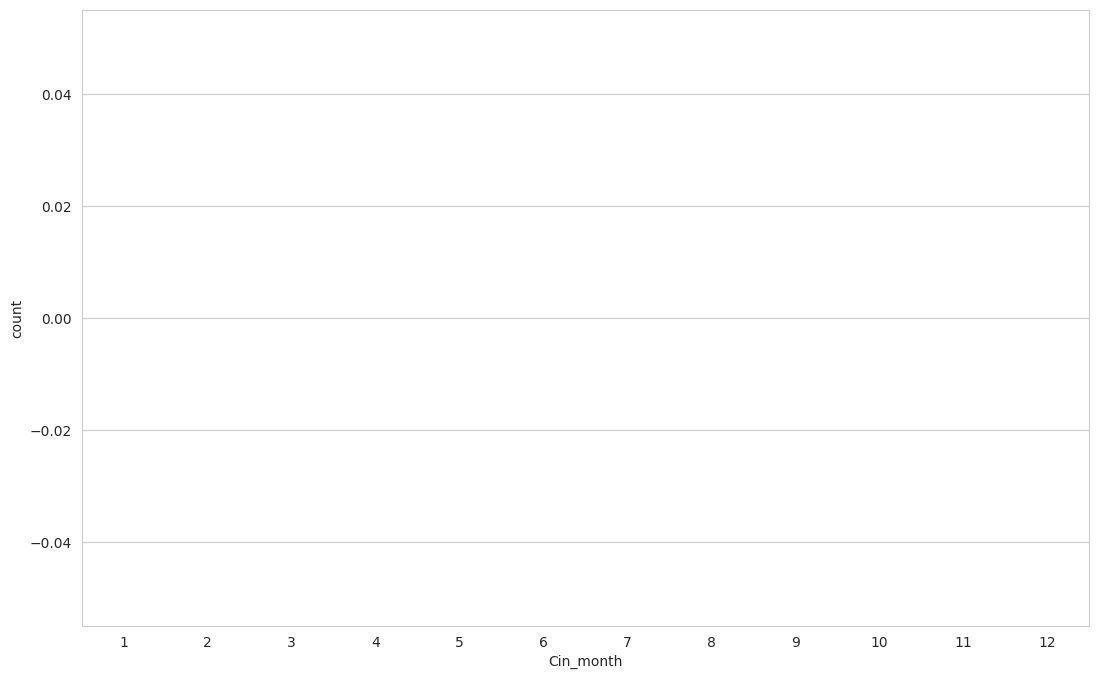

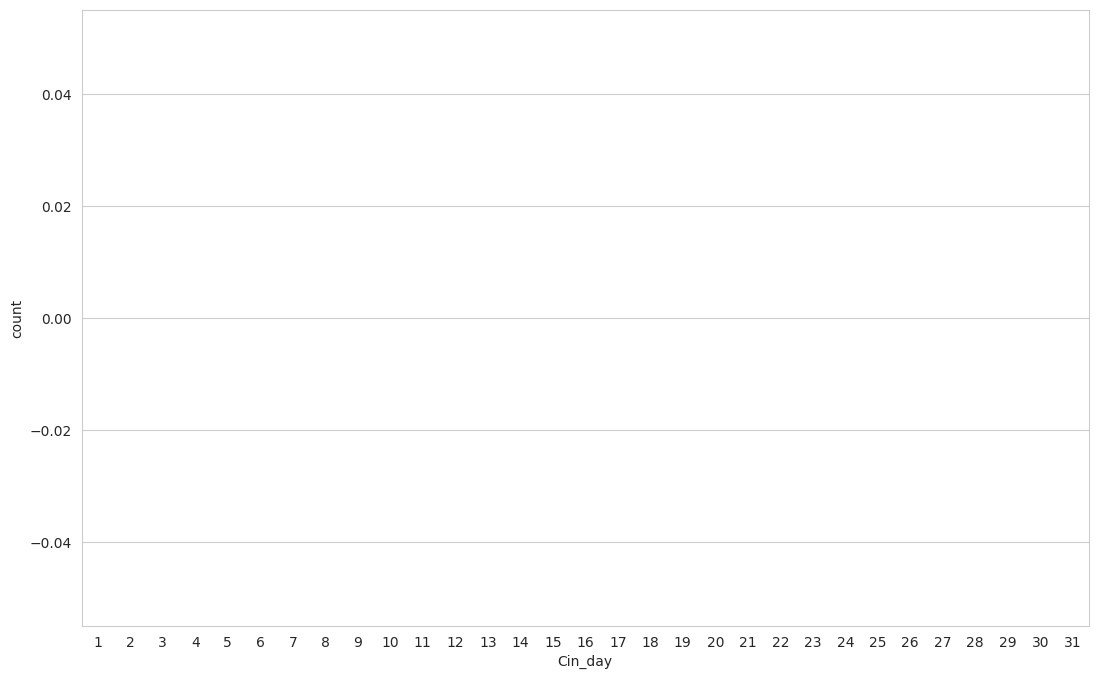

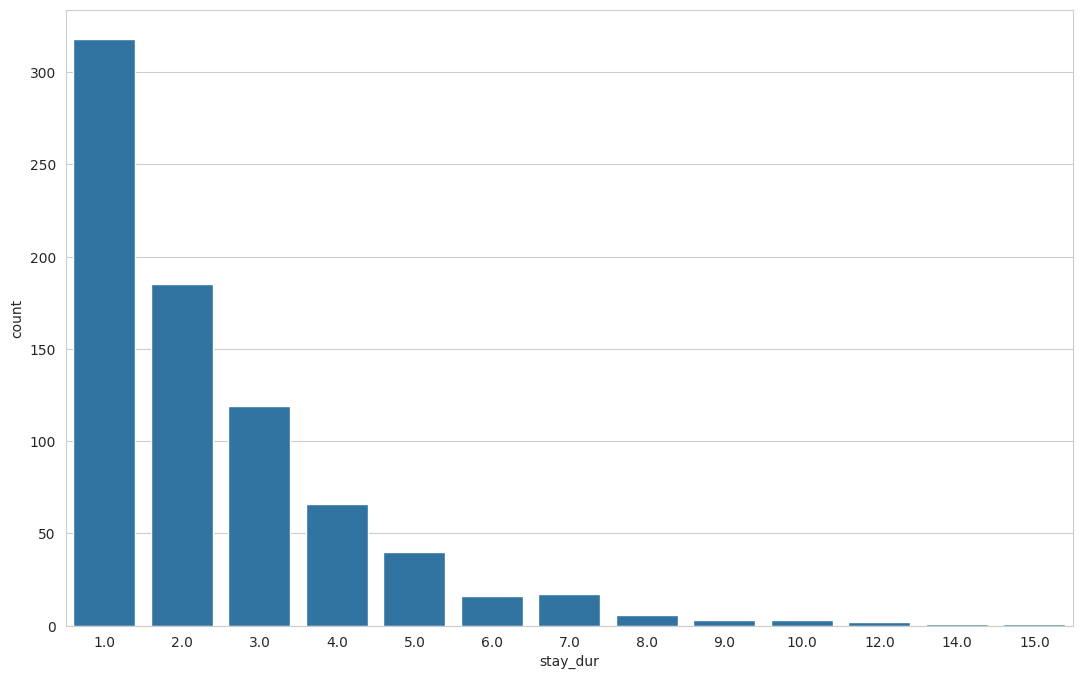

In [3]:


def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).dt.days
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).dt.days
    
    # For hotel check-in
    df['Cin_day'] = df['srch_ci'].dt.day
    df['Cin_month'] = df['srch_ci'].dt.month
    df['Cin_year'] = df['srch_ci'].dt.year
    
    
    
convert_date_into_days(train_df)
convert_date_into_days(test_df)   
train_df = train_df.dropna(subset=['Cin_day'])

print(train_df.head(3))


# Count the bookings in each month
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
palette = sns.color_palette("husl", 12)
sns.countplot(x = 'Cin_month',data=train_df[train_df["is_booking"] == 1],order=list(range(1,13)),ax=ax, palette=palette)

# Count the bookings as per the day
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
palette = sns.color_palette("husl", 31)
sns.countplot(x = 'Cin_day',data=train_df[train_df["is_booking"] == 1],order=list(range(1,32)),ax=ax, palette=palette)

# Count the bookings as per the stay_duration
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x = 'stay_dur',data=train_df[train_df["is_booking"] == 1],ax=ax)

# drop unnecessary columns, these columns won't be useful in analysis and prediction
test_user_id = test_df['user_id']
columns = ['date_time', 'srch_ci','user_id','srch_destination_type_id','srch_destination_id', 'site_name', 'user_location_region', 'user_location_city', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
#train_df.drop(columns=columns,axis=1,inplace=True)
#test_df.drop(columns=columns,axis=1,inplace=True)

print(train_df[train_df["is_booking"] == 1].shape)


In [4]:
# Check the percentage of Nan in dataset
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df['hotel_cluster'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Fill nan with the day which has max occurence
train_df['Cin_day'] = train_df['Cin_day'].fillna(26.0)
train_df['Cin_month'] = train_df['Cin_month'].fillna(8.0)
train_df['Cin_year'] = train_df['Cin_year'].fillna(2014.0)
train_df['stay_dur'] = train_df['stay_dur'].fillna(1.0)
train_df['no_of_days_bet_booking'] = train_df['no_of_days_bet_booking'].fillna(0.0)

# Fill average values in place for nan, fill with mean

train_df['orig_destination_distance'] = train_df['orig_destination_distance'].fillna(train_df['orig_destination_distance'].mean())


<Axes: >

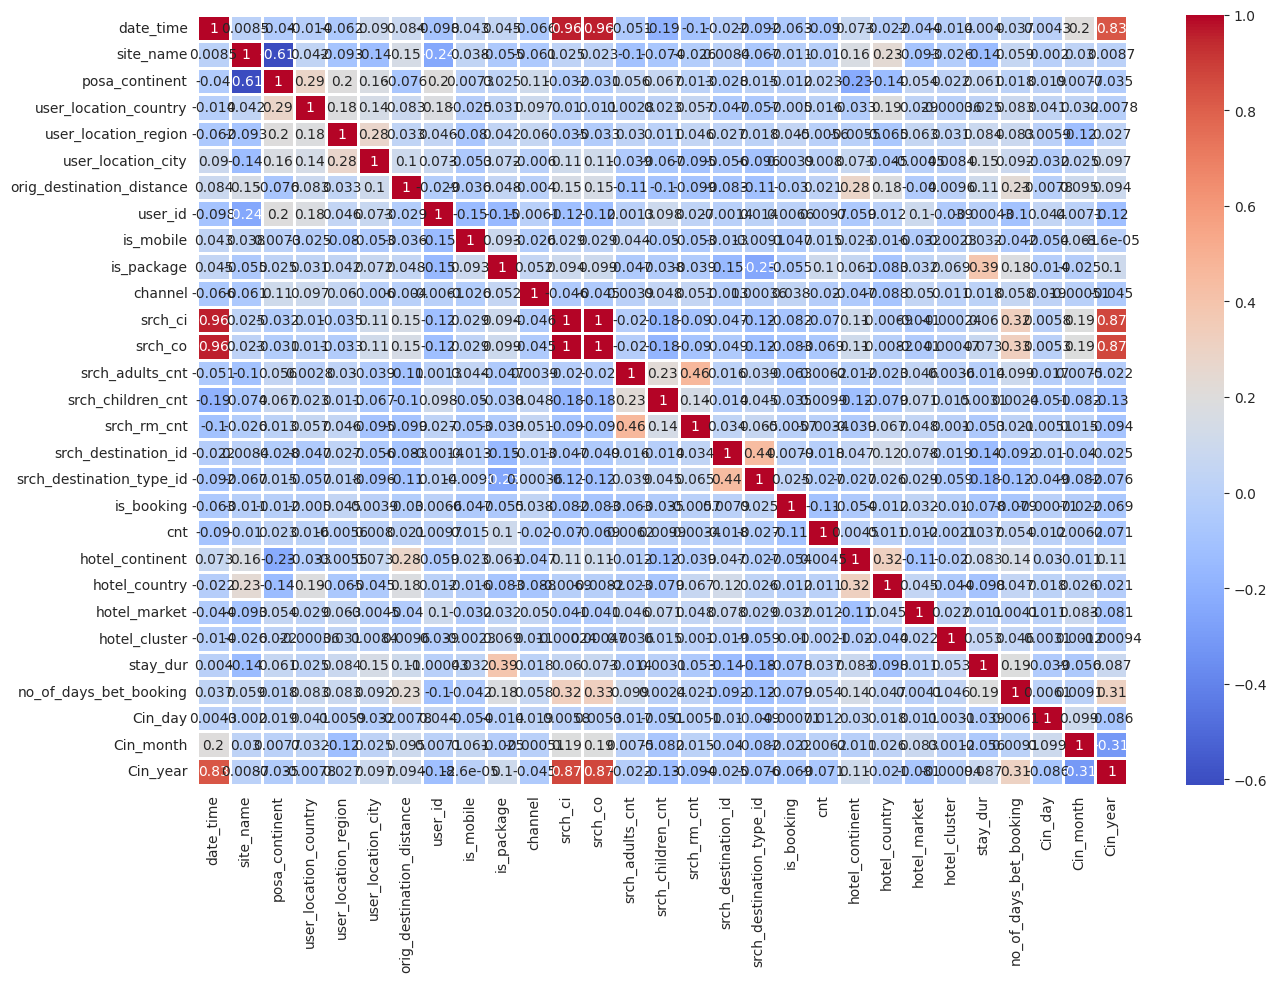

In [5]:
# heatmap
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

## los elementos de la matriz de correlacion son: cov(i,j)/(sigma_i*sigma_j). 
sns.heatmap(train_df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [60]:
train = pd.read_csv('data/train.csv', nrows=10000 ,
                    dtype={'user_id':np.int64,'is_booking':bool,'srch_destination_id':np.int32, 'hotel_cluster':np.int32},
                    usecols=['user_id','srch_destination_id','is_booking','hotel_cluster'],
                    chunksize=100)

aggs0 = []
print('-'*38)
for chunk in train:
    agg = chunk.groupby(['srch_destination_id',
                         'hotel_cluster'])['is_booking'].agg(['sum','count'])   #suma en cada chunk
    agg.reset_index(inplace=True)
    aggs0.append(agg)
    print('.',end='')
print('')
aggs0 = pd.concat(aggs0, axis=0)
#print(aggs0['user_id'])


# Step 2
CLICK_WEIGHT = 0.05
agg1 = aggs0.groupby(['srch_destination_id','hotel_cluster']).sum().reset_index()  # ahora suma de nuevo pues tengo que suma la suma obtenida en cada chunk
agg1['count'] -= agg1['sum']
agg1 = agg1.rename(columns={'sum':'bookings','count':'clicks'})
agg1['relevance'] = agg1['bookings'] + CLICK_WEIGHT * agg1['clicks']
#print(agg1)



df_merged = pd.merge(train_df, agg1[['srch_destination_id', 'hotel_cluster', 'relevance']], 
                     on=['srch_destination_id', 'hotel_cluster'], how='left')


# this dataframe contains the latent features (same for teh same srch detination id, but also the 'relevance' that is different for the differents hotel clusters)
df_final = pd.merge(df_merged, destination, on='srch_destination_id', how='inner')

#print(df_final)
columns_to_drop = ['srch_destination_type_id','is_mobile',  'is_package', 'srch_adults_cnt', 'srch_rm_cnt','srch_children_cnt','is_booking','cnt','hotel_continent','hotel_country','hotel_market','orig_destination_distance','user_location_city','user_location_region','user_location_country','date_time', 'orig_destination_distance', 'srch_ci', 'srch_co', 'channel', 'site_name', 'posa_continent']


df_cleaned = df_final.drop(columns=columns_to_drop)

latent_features = df_cleaned.filter(regex='^d')


# Create user profiles
def compute_user_profile(x):
    weighted_features = np.average(latent_features.loc[x.index], axis=0, weights=x['relevance'])
    return pd.Series(weighted_features, index=[f'profile_d{i}' for i in range(1, latent_features.shape[1] + 1)])

user_profiles = df_cleaned.groupby('user_id').apply(compute_user_profile).reset_index()
user_profiles.columns = ['user_id'] + [f'profile_d{i}' for i in range(1, latent_features.shape[1] + 1)]

#print(user_profiles)


# Calculate cosine similarity between user profiles and hotel latent features
user_profiles_matrix = user_profiles.filter(like='profile_d').values
hotel_latent_features_matrix = latent_features.filter(regex='^d').values

# Compute similarity scores
similarity_scores = cosine_similarity(user_profiles_matrix, hotel_latent_features_matrix)

# Add similarity scores to DataFrame
recommendations = pd.DataFrame(similarity_scores, index=user_profiles['user_id'], columns=latent_features.index)
recommendations = recommendations.stack().reset_index()
recommendations.columns = ['user_id', 'hotel_cluster', 'similarity_score']

# Sort recommendations by score for each user
recommendations = recommendations.sort_values(by=['user_id', 'similarity_score'], ascending=[True, False])

# Output top recommendations for each user
top_recommendations = recommendations.groupby('user_id').head(5)  # Top 10 recommendations per user

#Agrupamos por 'user_id' y agregamos los 5 mejores 'hotel_cluster' separados por espacios
def format_clusters(clusters):
    return ' '.join(map(str, clusters))

result = top_recommendations.groupby('user_id')['hotel_cluster'].apply(lambda x: format_clusters(x.head(5))).reset_index()

# Renombramos las columnas para el formato deseado
result.columns = ['id', 'hotel_cluster']
print(result)


# Guardamos el DataFrame resultante en un archivo CSV
result.to_csv('submission.csv', index=False)

--------------------------------------
....................................................................................................
      id        hotel_cluster
0     12    186 187 188 535 0
1    501            3 4 5 6 7
2    756        9 10 11 12 13
3    776    186 187 188 535 0
4   1048       24 25 26 51 52
5   1482    70 71 500 501 502
6   1561       78 74 75 76 77
7   1713       81 82 83 84 85
8   2451       94 95 96 97 98
9   2677   105 106 107 161 94
10  3313         0 1 2 18 172
11  3925  175 176 177 178 440
12  3972  240 241 242 267 268
13  3994  363 364 365 366 367
14  4539  389 390 393 394 446
15  4704  422 423 458 459 468
16  5131  429 424 425 426 427
17  5677  430 431 432 530 531
18  5736  122 123 436 413 414
19  5776  440 441 442 374 406
20  6258         0 1 2 18 172
21  6300  457 453 455 456 454
22  6304  179 180 181 182 460
23  6330            3 4 5 6 7
24  6356  510 511 512 513 514
25  6450         0 1 2 18 172


/tmp/ipykernel_6253/458515351.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_profiles = df_cleaned.groupby('user_id').apply(compute_user_profile).reset_index()
